In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_auc_score

%matplotlib notebook

In [8]:
def sim(ntrials, nsubj, comp, bias=0, sens=1, thresh=.51, noise=0.03):
    phis = []
    aucs = []
    for subj in range(nsubj):
        hits = np.random.choice([0, 1], ntrials, p = [1-comp, comp])
        conf = 1 / (1 + np.exp(-(bias + sens*hits + np.random.normal(loc = 0.0, scale = noise, 
                         size=ntrials))))
        discrete_conf = (conf>thresh).astype(int)

        tn, fp, fn, tp = confusion_matrix(hits, discrete_conf).ravel()
        p,n,p_,n_ = tp+fn, fp+tn, tp+fp, tn+fn
        phi = (tp*tn - fp*fn) / np.sqrt(p*n*p_*n_)
        auc = roc_auc_score(hits, conf)
        
        phis.append(phi)
        aucs.append(auc)
    return phis, aucs

bias = 0, mean phi = 0.9008506819393706, auc = 1.0
bias = 0, mean phi = 0.8547323677910632, auc = 0.9812549290777173
bias = 0, mean phi = 0.8127262251138901, auc = 0.9689879048594424
bias = 0, mean phi = -0.021271657612972974, auc = 0.4940425090082458
bias = 0.0, mean phi = 0.9174622642696719, auc = 1.0
bias = 0.02, mean phi = 0.7710988107369405, auc = 1.0
bias = 0.03, mean phi = 0.6717258156149807, auc = 1.0


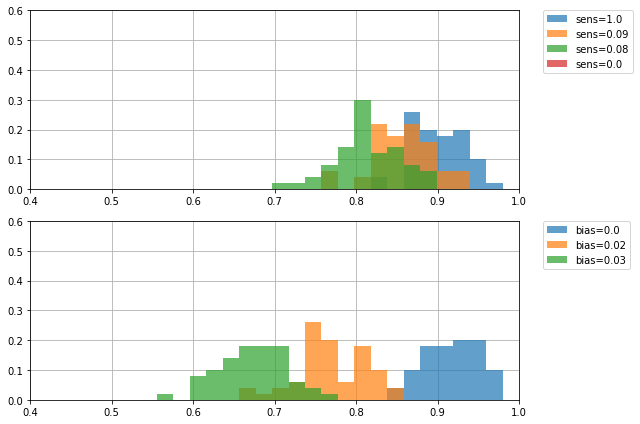

In [10]:
# Setup
# np.random.seed(1)
ntrials = 200
nsubj = 50
noise = .03

# Agent params
comp = .5
bias = 0
sens = 1
thresh = .51

plt.figure(1, figsize=(9,6))

plt.subplot(2,1,1)
plt.grid(zorder=0)
plt.xlim(0.4,1)
plt.ylim(0,.6)
for sens in [1.00, 0.09, 0.08, 0.00]:
    phis, aucs = sim(ntrials, nsubj, comp, bias, sens, thresh, noise)
    print('bias = {}, mean phi = {}, auc = {}'.format(bias, np.mean(phis), np.mean(aucs)))    
    w = np.zeros_like(phis) + 1. / len(phis)
    plt.hist(phis, weights=w, zorder=2, alpha=.7, bins=np.linspace(-1,1,100), label='sens={}'.format(sens))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
plt.subplot(2,1,2)
plt.grid(zorder=0)
plt.xlim(0.4,1)
plt.ylim(0,.6)
for bias in [0.0, .02, .03]:
    phis, aucs = sim(ntrials, nsubj, comp=comp, bias=bias)
    print('bias = {}, mean phi = {}, auc = {}'.format(bias, np.mean(phis), np.mean(aucs)))    

    w = np.zeros_like(phis) + 1. / len(phis)
    plt.hist(phis, weights=w, zorder=2, alpha=.7, bins=np.linspace(-1,1,100), label='bias={}'.format(bias))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()